# Extremely Randomized Trees (Extra-Trees)

In [1]:
import numpy as np
import time as t
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import load_spam_data
from sklearn import datasets
import datetime


## Introduction : un bref rappel sur les _Tree-based models_

Nous avons vu en cours différents modèles basés sur les arbres, et principalement sur les arbres de décisions. Ces arbres de décicisons sont principalement utilisés dans deux types de problèmes : les problèmes de classification, et les problèmes de régression. Les arbres de décisions sont les constituants principaux des algorithmes de _Random Forest_, de _Bagging_, de _Boosting_,... 


Au travers de ces différentes méthodes, on fait grandir des arbres de manière déterministe ou aléatoire pour répondre à des problèmes de classification ou de régression.

Un arbre de décision est constitué de noeuds. Chaque noeud représente un test qui porte sur les paramètres de nos données. Le résultat d'un test mène à l'un des _fils_ de ce noeud. Après avoir enchaîné les différents tests, on se retrouve au bout de l'arbre sur un noeud sans fils que l'on appelle une _feuille_ et qui est le résultat de notre arbre de décision.

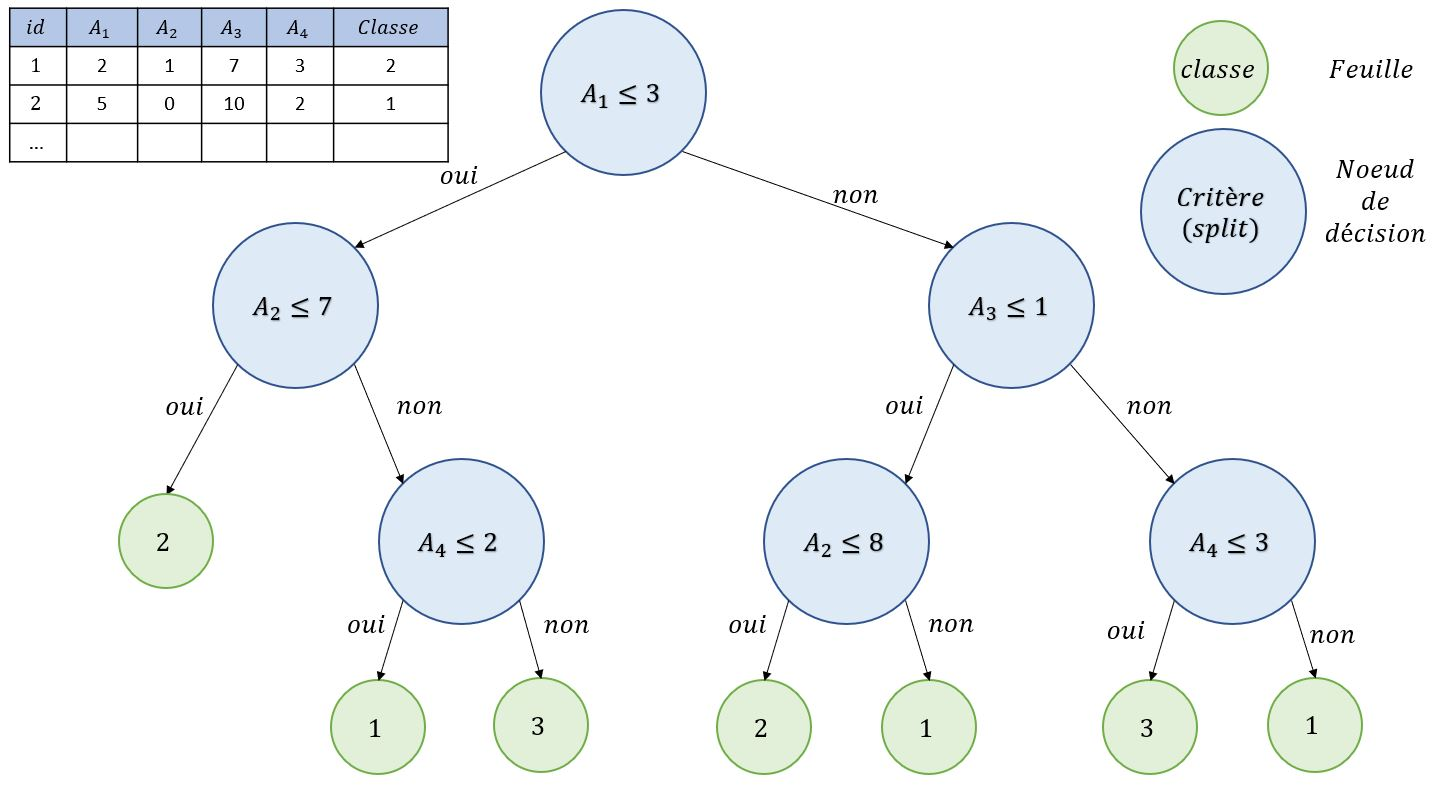

Dans certains algorithmes, comme celui de _Random Forest_ et celui des _Extremly Randomized Trees_, on va construire plusieurs arbres. C'est ce qu'on appelle le _bagging_. Chaque échantillon/donnée passera aux travers de ces arbres et on obtiendra autant de décision qu'il y a d'arbres. Une fois toutes ces décisions obtenues, on prend la décision majoritaire dans le cas de la classification, et la moyenne dans un problème de régression.

![DecisionTreeUrl](https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif)

Pour plus de précisions, veuillez vous référer aux cours n° 8, 9, 10, 11 et 12.

## Présentation : les _Extremely Randomized Trees_ ou _Extra Trees_

Comme pour l'algortihme de _Random Forest_, nous allons construire plusieurs arbres de décisions. Cependant, le point de coupure de chaque noeud est choisi complètement aléatoirement. De plus, contrairement à l'agorithme _Random Forest_, on utilise l'ensemble des donnés et non pas un sous-ensemble.

Les données utilisées dans cet algortihme ont la forme suivante :
* On appelle **attributs** les différents paramètres qui décrivent une donnée
* On appelle **sortie** la valeur cible qui définit notre problème de supervision (catégorie ou valeur réelle)

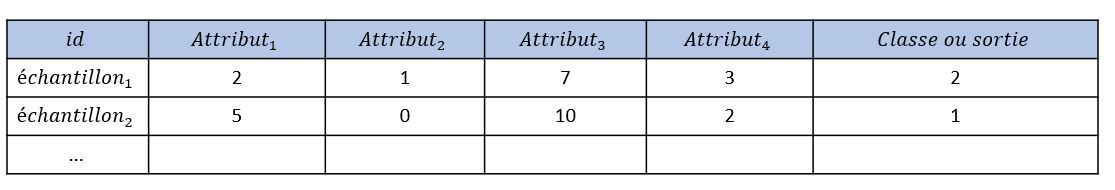

Les paramètres (pincipaux) de l'algorithme _Extra-Trees_ sont les suivants : 
* **K** Le nombre d'attributs aléatoirement selectionnés pour faire le split à chaque noeud
* **n_min** La taille minimum de l'ensemble des données encore présentes pour effectuer le split
* **M** Le nombre d'arbres utilisé dans la forêt

<div class="alert alert-warning" role="alert">
    <b>Description de l'algorithme</b>
    <br>
    On va construire <i> M </i> arbres de décisions.
    <br>
    Chaque arbre est construit de la manière suivante :
    <ul>
        <li>Tant que <i>Stop_Split</i> est FAUX, on construit des noeuds dans l'arbre</li>
        <li>Pour construire un noeud, on sélectionne <i> K </i> attributs différents pour lesquels on choisit un point de coupe (split) aléatoire. Le split qui fournit le meilleur score est sélectionné.</li>
      <li> Un split est pris aléatoirement entre la valeur minimal et la valeur maximal de l'attribut parmi les données encore présentes au noeud auquel on est situé.</li>
        <li> <i>Stop_Split</i> devient vrai lorsqu'il n'y a plus assez d'éléments, si tous les attributs sont constants ou si toutes les sorties sont constantes </li>
    </ul>
    Une fois les <i> M </i> arbres construits on obtient le résultat du problème de supervision en faisant :
    <ul>
        <li> la moyenne des sorties des arbres dans le cas d'un problème de régression </li>
        <li> un vote majoritaire dans le cas d'un problème de classification </li>
    </ul>
</div>

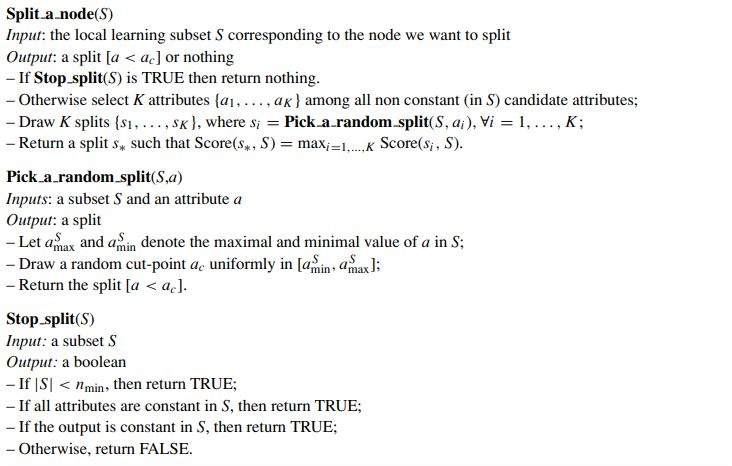

Le score est donné dans le cas d'un problème de régression par la diminution de la variance, et dans le cas d'une classification par une version normalisé de l'entropie de Shannon.

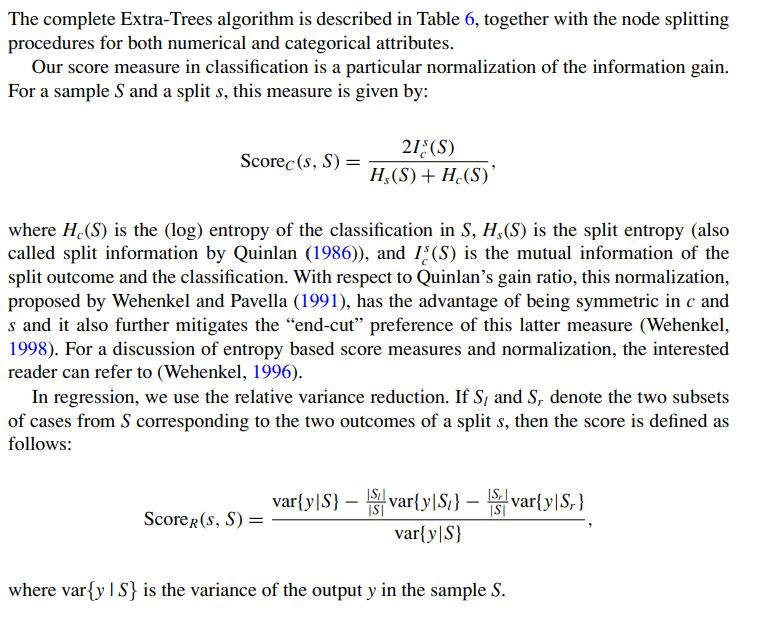

## Mise en pratique : Classification

Nous utiliserons l'implémentation proposée par _scikitlearn_. Pour la documentation complète : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Comme en classe, on va utiliser essayer de classifier des images qui représentent des nombres.

### NIST

In [2]:
digits = datasets.load_digits()
#print(digits.data.shape)
#print(digits.images.shape)
#print(digits.target.shape)
#print(digits.target_names)

X = digits.data
y = digits.target
Xtrain,Xtest = np.split(X,[1000])
ytrain,ytest = np.split(y,[1000])

#print(digits.DESCR)

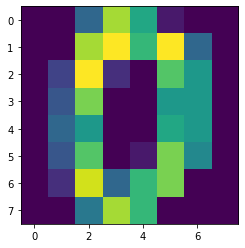

In [25]:
plt.imshow(digits.images[0])

De la même manière qu'avec Random Forest, on utilise l'implémentation de sklearn

In [4]:
M = 100 # number of decision trees
K = int(np.sqrt(len(X[0]))) # number of attributes to pick randomly
n_min = 2 # minimal number of data entries to make the split
score_function = 'gini' #'entropy' or 'gini'


extra_tree = ExtraTreesClassifier(n_estimators = M , criterion = score_function, min_samples_split = n_min, max_features = K )
extra_tree.fit(Xtrain,ytrain)
extra_tree_pred = extra_tree.predict(Xtest)

Observons les résultats maintenant :

Generalization error: 0.05144291091593475
Generalization score: 0.9485570890840652
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


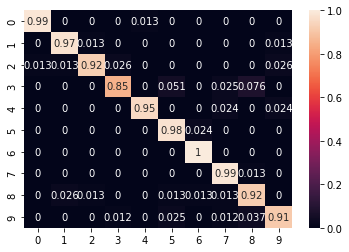

In [5]:
print("Generalization error:", np.sum(np.not_equal(extra_tree_pred,ytest))/len(ytest) )
print("Generalization score:", extra_tree.score(Xtest,ytest))

print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest, extra_tree_pred,normalize='true'), annot=True))
#print(confusion_matrix(ytest, extra_tree_pred)) # to use if you don't have seaborn

### Spams

Comme dans le cours, nous allons désormais essayer de déterminier si des emails sont des spams.

In [6]:
spam_data = load_spam_data.spam_data_loader()
spam_data.load_data()

Xtrain, ytrain, Xtest, ytest = spam_data.split(2000)

In [7]:

M = 100 # number of decision trees
K = None # None | 'sqrt' |'auto' | 'log2' -> number of attributes to pick randomly
n_min = 2 # default = 2 -> minimal number of data entries to make the split
score_function = 'gini' #'entropy' or 'gini'


extra_tree = ExtraTreesClassifier(n_estimators = M , criterion = score_function, min_samples_split = n_min, max_features = K )
extra_tree.fit(Xtrain,ytrain)
extra_tree_pred = extra_tree.predict(Xtest)

Generalization error: 0.036954087346024636
Generalization score: 0.9630459126539753
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


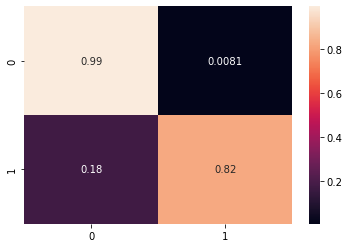

In [8]:

print("Generalization error:", np.sum(np.not_equal(extra_tree_pred,ytest))/len(ytest) )
print("Generalization score:", extra_tree.score(Xtest,ytest))

print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest, extra_tree_pred,normalize= 'true'), annot=True))
#print(confusion_matrix(ytest, extra_tree_pred)) # to use if you don't have seaborn

### Un exemple plus compliqué ...

On charge ici un autre dataset. Celui-ci contient des observations qui permettent de déterminer l'espèce dominante d'arbre sur un patch de 30x30 m². Chaque échantillion est définit par 54 features, et il existe 7 catégories. 

Ce dataset est beaucoup plus grand, c'est pourquoi il peut être un peu plus long de faire tourner les cellules ci-dessous. Cependant cela ne devrait pas excéder 5 minutes.

In [9]:
forests = datasets.fetch_covtype()
#print(forests.data.shape)
#print(forestss.target.shape)
#print(forests.target_names)
print(forests.DESCR) # Donne une description du dataset

X = forests.data
y = forests.target
Xtrain,Xtest = np.split(X,[int(len(X)*0.8)]) # on s'entraine sur 80% du jeu de données
ytrain,ytest = np.split(y,[int(len(y)*0.8)])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [10]:
M = 50 # number of decision trees
K = 'sqrt' # None | 'sqrt' |'auto' | 'log2' -> number of attributes to pick randomly
n_min = 2 # default = 2 -> minimal number of data entries to make the split
score_function = 'entropy' #'entropy' or 'gini'


extra_tree = ExtraTreesClassifier(n_estimators = M , criterion = score_function, min_samples_split = n_min, max_features = K )
extra_tree.fit(Xtrain,ytrain)
extra_tree_pred = extra_tree.predict(Xtest)


Generalization error: 0.28203230553428055
Generalization score: 0.7179676944657195
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


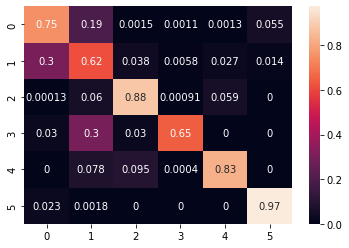

In [11]:
print("Generalization error:", np.sum(np.not_equal(extra_tree_pred,ytest))/len(ytest) )
print("Generalization score:", extra_tree.score(Xtest,ytest))

print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest, extra_tree_pred,normalize= 'true'), annot=True))
#print(confusion_matrix(ytest, extra_tree_pred)) # to use if you don't have seaborn

<div class="alert alert-success" role="alert">
    <b> Exercice </b>
    <br>
    <i> Gotta tune them all ! </i> Essayez de comprendre l'influence des paramètres sur les performances de ce classifier extra-trees ! Attention au dernier exemple, selon les réglages le temps de calcul peut être un peu long !
</div>


<details class="alert alert-warning">
    <summary markdown="span"><b>Quelques mots sur les paramètres</b></summary>
    Par défaut, les paramètres des algorithmes Extra-Trees ont des valeurs prédéfinis. Ces valeurs permettent dans la grande majorité des cas d'avoir des résultats optimaux. Ces paramètres sont légérement différents selon que l'on soit sur un problème de régression ou un problème de classification. Voici les valeurs par défaut :
    <li> M = 100 </li>
    <li> K = sqrt(n) où n est le nombre d'attributs </li>
    <li> n_min = 2 </li>
    <li> score : Entropie de Shanon </li>
    <br>
    Quelques mots sur l'influence de ces paramètres :
    <li> Plus K est petit, plus les splits seront aléatoires, et moins la structure de la donnée influence le résultat de sortie. Lorsque K est égal au nombre d'attributs, l'aspect aléatoire de l'algorithme est moins explicit et n'intervient plus qu'au moment du choix du critère de coupure.</li>
    <li> De grandes valeurs de n_min mènent à des arbres plus petits avec plus de biais et moins de variance. La valeur optimale dépend du bruit présent dans les données. Pour des problèmes très bruités, des abres trop grand risquent de produire de l'over-fit. </li>
    <li> Plus M est grand, plus les résultats seront bons. On se limite néanmoins en général à M=100 pour conserver une complexité acceptable. </li>
    
</details>

## Comparaison : _Random Forest_ vs _Extra-Trees_

Nous allons à présent comparer les deux algorithmes. Pour cela, on va utiliser les réglages par défaut de ces algorithmes. 

/!\ Attention la prochaine cellule est un peu longue à lancer, mais pas de panique /!\

In [12]:
#NIST comparision
digits = datasets.load_digits()
X = digits.data
y = digits.target
Xtrain_NIST,Xtest_NIST = np.split(X,[1000])
ytrain_NIST,ytest_NIST = np.split(y,[1000])


extra_tree_NIST = ExtraTreesClassifier(n_estimators = 100)
t0= t.time()
extra_tree_NIST.fit(Xtrain_NIST,ytrain_NIST)
extra_tree_time_NIST = t.time()-t0


random_forest_NIST = RandomForestClassifier(n_estimators = 100)
t0=t.time()
random_forest_NIST.fit(Xtrain_NIST,ytrain_NIST)
random_forest_time_NIST = t.time()-t0

#Spams comparision
spam_data = load_spam_data.spam_data_loader()
spam_data.load_data()
Xtrain_spams, ytrain_spams, Xtest_spams, ytest_spams = spam_data.split(2000)


extra_tree_spams = ExtraTreesClassifier(n_estimators = 100)
t0=t.time()
extra_tree_spams.fit(Xtrain_spams,ytrain_spams)
extra_tree_time_spams = t.time()-t0


random_forest_spams = RandomForestClassifier(n_estimators = 100)
t0=t.time()
random_forest_spams.fit(Xtrain_spams,ytrain_spams)
random_forest_time_spams = t.time()-t0

#Forest covertype comparision
forests = datasets.fetch_covtype()
X = forests.data
y = forests.target
Xtrain_cov,Xtest_cov = np.split(X,[int(len(X)*0.8)])
ytrain_cov,ytest_cov = np.split(y,[int(len(y)*0.8)])


extra_tree_cov = ExtraTreesClassifier(n_estimators = 80)

t0=t.time()
extra_tree_cov.fit(Xtrain_cov,ytrain_cov)
extra_tree_time_cov = t.time()-t0


random_forest_cov = RandomForestClassifier(n_estimators = 80)
t0=t.time()
random_forest_cov.fit(Xtrain_cov,ytrain_cov)
random_forest_time_cov = t.time()-t0


Regardons d'abord la complexite (en nombre de noeuds) des arbres ainsi que la complexité en temps (ms) :

In [13]:
def count_nodes(tree_classifier):
    return sum( tree.tree_.node_count for tree in tree_classifier.estimators_ )

In [14]:
print('Number of nodes NIST problem : extra_tree ->', count_nodes(extra_tree_NIST), '/ Random Forest -> ', count_nodes(random_forest_NIST)) 
print('Time duration NIST problem : extra_tree ->', int(extra_tree_time_NIST * 1000), '/ Random Forest -> ', int(random_forest_time_NIST * 1000),'\n')
print('Number of nodes spams problem : extra_tree ->', count_nodes(extra_tree_spams), '/ Random Forest -> ', count_nodes(random_forest_spams)) 
print('Time duration spams problem : extra_tree ->', int(extra_tree_time_spams * 1000), '/ Random Forest -> ', int(random_forest_time_spams * 1000),'\n')
print('Number of nodes forest covertyper problem : extra_tree ->', count_nodes(extra_tree_cov), '/ Random Forest -> ', count_nodes(random_forest_cov)) 
print('Time duration forest covertype problem : extra_tree ->', int(extra_tree_time_cov * 1000), '/ Random Forest -> ', int(random_forest_time_cov * 1000),'\n')

Number of nodes NIST problem : extra_tree -> 53252 / Random Forest ->  25998
Time duration NIST problem : extra_tree -> 154 / Random Forest ->  198 

Number of nodes spams problem : extra_tree -> 61164 / Random Forest ->  31456
Time duration spams problem : extra_tree -> 1854 / Random Forest ->  989 

Number of nodes forest covertyper problem : extra_tree -> 20475214 / Random Forest ->  6733284
Time duration forest covertype problem : extra_tree -> 73184 / Random Forest ->  75668 



<div class="alert alert-warning" role="alert">
    On observe que si l'algorithme extra-tree produit des modèles plus complexes (avec plus de noeuds), il est en général plus rapide. Si ce n'est pas le cas sur votre essai, vous pouvez le relancer ! Vous pouvez aussi utiliser la cellule ci-dessous pour mieux mesurer le temps d'exécution, attention cela peut être long !

In [15]:
%%timeit -r 3 -n 10
#scipt à mesurer
#
extra_tree_NIST.fit(Xtrain_NIST,ytrain_NIST)
#
#

163 ms ± 7.04 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


Nous allons maintenant comparer les performances de ces algorithmes : 

------------------- EXTRA TREE NIST -------------------
Generalization error: 0.05897114178168131
Generalization score: 0.9410288582183187
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


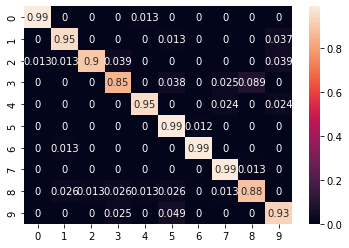

In [16]:
print("------------------- EXTRA TREE NIST -------------------")
Xpred_NIST =extra_tree_NIST.predict(Xtest_NIST)
print("Generalization error:", np.sum(np.not_equal(Xpred_NIST,ytest_NIST)/len(ytest_NIST) ))
print("Generalization score:", extra_tree_NIST.score(Xtest_NIST,ytest_NIST))
print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest_NIST, Xpred_NIST,normalize= 'true'), annot=True))

------------------- RANDOM FOREST NIST -------------------
Generalization error: 0.07026348808030113
Generalization score: 0.9297365119196989
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


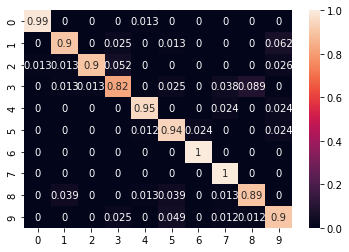

In [17]:
print("------------------- RANDOM FOREST NIST -------------------")
Xpred_NIST =random_forest_NIST.predict(Xtest_NIST)
print("Generalization error:", np.sum(np.not_equal(Xpred_NIST,ytest_NIST)/len(ytest_NIST) ))
print("Generalization score:", random_forest_NIST.score(Xtest_NIST,ytest_NIST))
print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest_NIST, Xpred_NIST,normalize= 'true'), annot=True)) 

------------------- EXTRA TREE SPAMS -------------------
Generalization error: 0.04255319148936171
Generalization score: 0.9574468085106383
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


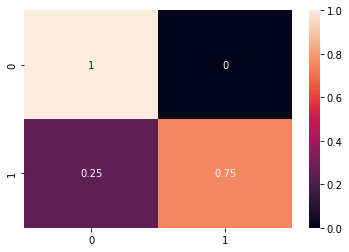

In [18]:
print("------------------- EXTRA TREE SPAMS -------------------")
Xpred_spams =extra_tree_spams.predict(Xtest_spams)
print("Generalization error:", np.sum(np.not_equal(Xpred_spams,ytest_spams)/len(ytest_spams) ))
print("Generalization score:", extra_tree_spams.score(Xtest_spams,ytest_spams))
print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest_spams, Xpred_spams,normalize= 'true'), annot=True))

------------------- RANDOM FOREST SPAMS -------------------
Generalization error: 0.04367301231802912
Generalization score: 0.9563269876819709
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


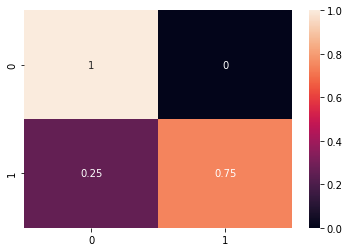

In [19]:
print("------------------- RANDOM FOREST SPAMS -------------------")
Xpred_spams =random_forest_spams.predict(Xtest_spams)
print("Generalization error:", np.sum(np.not_equal(Xpred_spams,ytest_spams)/len(ytest_spams) ))
print("Generalization score:", random_forest_spams.score(Xtest_spams,ytest_spams))
print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest_spams, Xpred_spams,normalize= 'true'), annot=True))

------------------- EXTRA TREE COVERTYPE -------------------
Generalization error: 0.2801907007564349
Generalization score: 0.7198092992435652
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


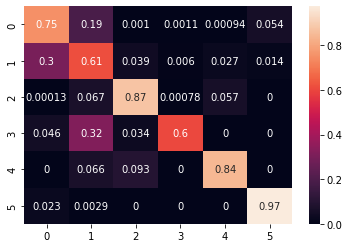

In [20]:
print("------------------- EXTRA TREE COVERTYPE -------------------")
Xpred_cov =extra_tree_cov.predict(Xtest_cov)
print("Generalization error:", np.sum(np.not_equal(Xpred_cov,ytest_cov)/len(ytest_cov) ))
print("Generalization score:", extra_tree_cov.score(Xtest_cov,ytest_cov))
print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest_cov, Xpred_cov,normalize= 'true'), annot=True))

------------------- RANDOM FOREST COVERTYPE -------------------
Generalization error: 0.30723819522731766
Generalization score: 0.6927618047726823
Confusion matrix:
AxesSubplot(0.125,0.125;0.62x0.755)


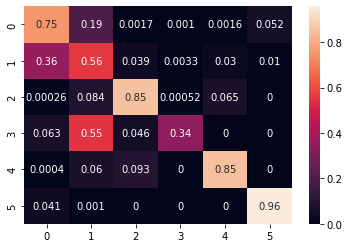

In [21]:
print("------------------- RANDOM FOREST COVERTYPE -------------------")
Xpred_cov =random_forest_cov.predict(Xtest_cov)
print("Generalization error:", np.sum(np.not_equal(Xpred_cov,ytest_cov)/len(ytest_cov) ))
print("Generalization score:", random_forest_cov.score(Xtest_cov,ytest_cov))
print("Confusion matrix:")
print(heatmap(confusion_matrix(ytest_cov, Xpred_cov,normalize= 'true'), annot=True))

<div class="alert alert-warning" role="alert">
    On observe ainsi que extra-tree est au moins aussi bon que random forest (même plutôt meilleur) !
</div>

<div class="alert alert-success" role="alert">
    <b> Exercice </b>
    <br>
    <i> À vous de jouer ! </i> Essayez de comparer les performances de ces deux algorithmes en changeant leurs paramètres ! Vous pouvez aussi essayer de comparer extra-tree à d'autres algorithmes !
</div>

## Conclusion Générale 

On a découvert une nouvelle manière de générer et d'utiliser les arbres de décisions. Si la méthode _Extremely Randomized Trees_ est proche de la méthode _Random Forest_, elle offre en générale des performances meilleures. On résume ci-dessous les points d'intérets :
* Plus grande complexité des modèles (arbres plus grands)
* Plus faible complexité de temps de calcul
* Résultats au moins aussi bon que Random Forest
* Variance du modèle plus faible, mais qui produit un biais plus élevé ...
* ... Cependant, le rapport biais/variance est en général plus intéressant

## Pour aller plus loin ...

Nous n'avons pas vraiment étudié ici le tradeoff biais/variance pour les différents algorithmes. Comme pour Random Forest, et comme pour toutes les méthodes de bagging, Extra-trees diminue la variance. Si ce sujet vous intéresse, vous pourrez trouver des résultats supplémentaires ici : https://projecteuclid.org/journalArticle/Download?urlId=10.1214%2Faos%2F1031689014

Pour aller plus loin, certains autres thèmes sont abordés dans ce papier : https://link.springer.com/content/pdf/10.1007/s10994-006-6226-1.pdf

Vous pourrez trouver des informations plus précises sur :
* l'aspect géométrique de l'algorithme
* l'aspect noyau de l'algorithme
* l'étude du tradeoff biais/variance
* l'influence du bruit des données ou des atrributs non pertinents sur l'algorithme

Cet algorithme est aussi utilisé dans d'autres travaux :
* Unsupervised extremely random trees : https://hal.inria.fr/hal-01667317/file/unsupervised-extremely-randomized_Dalleau_Couceiro_Smail-Tabbone.pdf
* AutoEncoder by Forest : https://arxiv.org/pdf/1709.09018.pdf
* ...



## Sources

* Papier principal :  https://link.springer.com/content/pdf/10.1007/s10994-006-6226-1.pdf
* Documentation dataset 'Forest covertype' : https://archive.ics.uci.edu/ml/datasets/covertype
* Documentation librairie : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
*